# Decision Trees Exercise

### Bibliotheken inportieren

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

### Daten importieren

Die Daten haben wir am Anfang als Bild.

In [2]:
DATA_as_Image = 'DATA.gif'
Image(url = DATA_as_Image)

Von diesem Daten haben wir:

In [3]:
buyComputer = 'Buy_Computer_Yes_No.png'
Image(url = buyComputer,  width=400)

Wir berechnen die Entropie mit der Formel:

In [4]:
buyComputer = 'formel_entropy.svg'
Image(url = buyComputer,  width=400)

Entropy(BuyComputer) = Entropy(8, 12) = Entropy(0.4, 0.6) = -0.4(Log(0.4, 2)) - 0.6(Log(0.6, 2)) = 0.97

## Decision tree by hand

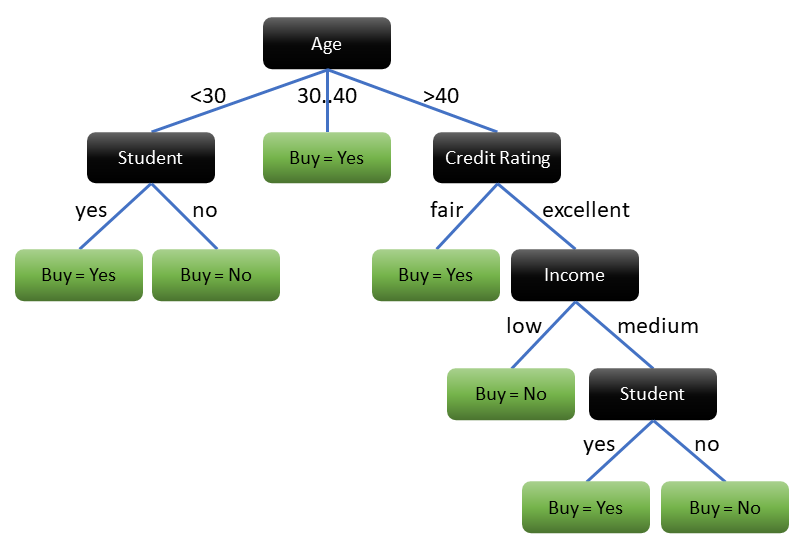

In [5]:
Image("decisiontree.PNG")




Wir konvertieren diese Daten als csv-Daten mit denen wir arbeiten können.

In [6]:
DATA = pd.read_csv('DATA.csv', delimiter=';')

In [7]:
print(DATA.head())

  REC     Age  Income Student Credit_rating Buys_computer
0  r1    <=30    high      no          fair            no
1  r2    <=30    high      no     excellent            no
2  r3  31..40    high      no          fair           yes
3  r4     >40  medium      no          fair           yes
4  r5     >40     low     yes          fair           yes


Wir brauchen die Spalte "REC" nicht, deshalb wird sie gelöscht.

In [8]:
del DATA["REC"]
print(DATA.head())

      Age  Income Student Credit_rating Buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2  31..40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes


Um die Daten mit Scikit-learn zu bearbeiten, sollten sie numerisch sein, deshalb werden die Daten jetzt konvertiert.

    -Die Altersgruppen werden so konvertiert: '<=30' = 0, '31-40' = 1, '>40' = 2
    -Die Gehälter werden so konvertiert: 'Low' = 0, 'Medium' = 1, 'High' = 2
    -Der Wert für Student oder nicht Student wird so konvertiert: 'No' = 0, 'Yes' = 1
    -Die Kreditswürdigkeit wird so konvertiert: 'Fair' = 0, 'Excellent' = 1
    -Ob ein Computer gekauft wird oder nicht wird so konvertiert: 'no' = 0, 'yes' = 1

In [9]:
Age = {"<=30": 0, "31..40": 1, ">40": 2}
Income = {"low": 0, "medium": 1, "high": 2}
Student = {"no": 0, "yes": 1}
Credit_rating = {"fair": 0, "excellent": 1}
Buys_computer = {"no": 0, "yes": 1}


DATA["Age"] = DATA["Age"].map(Age)
DATA["Income"] = DATA["Income"].map(Income)
DATA["Student"] = DATA["Student"].map(Student)
DATA["Credit_rating"] = DATA["Credit_rating"].map(Credit_rating)
DATA["Buys_computer"] = DATA["Buys_computer"].map(Buys_computer)

print(DATA.head())

   Age  Income  Student  Credit_rating  Buys_computer
0    0       2        0              0              0
1    0       2        0              1              0
2    1       2        0              0              1
3    2       1        0              0              1
4    2       0        1              0              1


In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(DATA[['Age','Income','Student','Credit_rating']], DATA['Buys_computer'])

DecisionTreeClassifier(max_depth=2)

In [11]:
export_graphviz(tree_clf, 
                out_file="buy_computer_tree.dot", 
                feature_names=DATA.columns[0:4],
                class_names=["Buys_computer=Yes", "Buys_computer=No"],
                rounded=True, 
                filled=True
               )

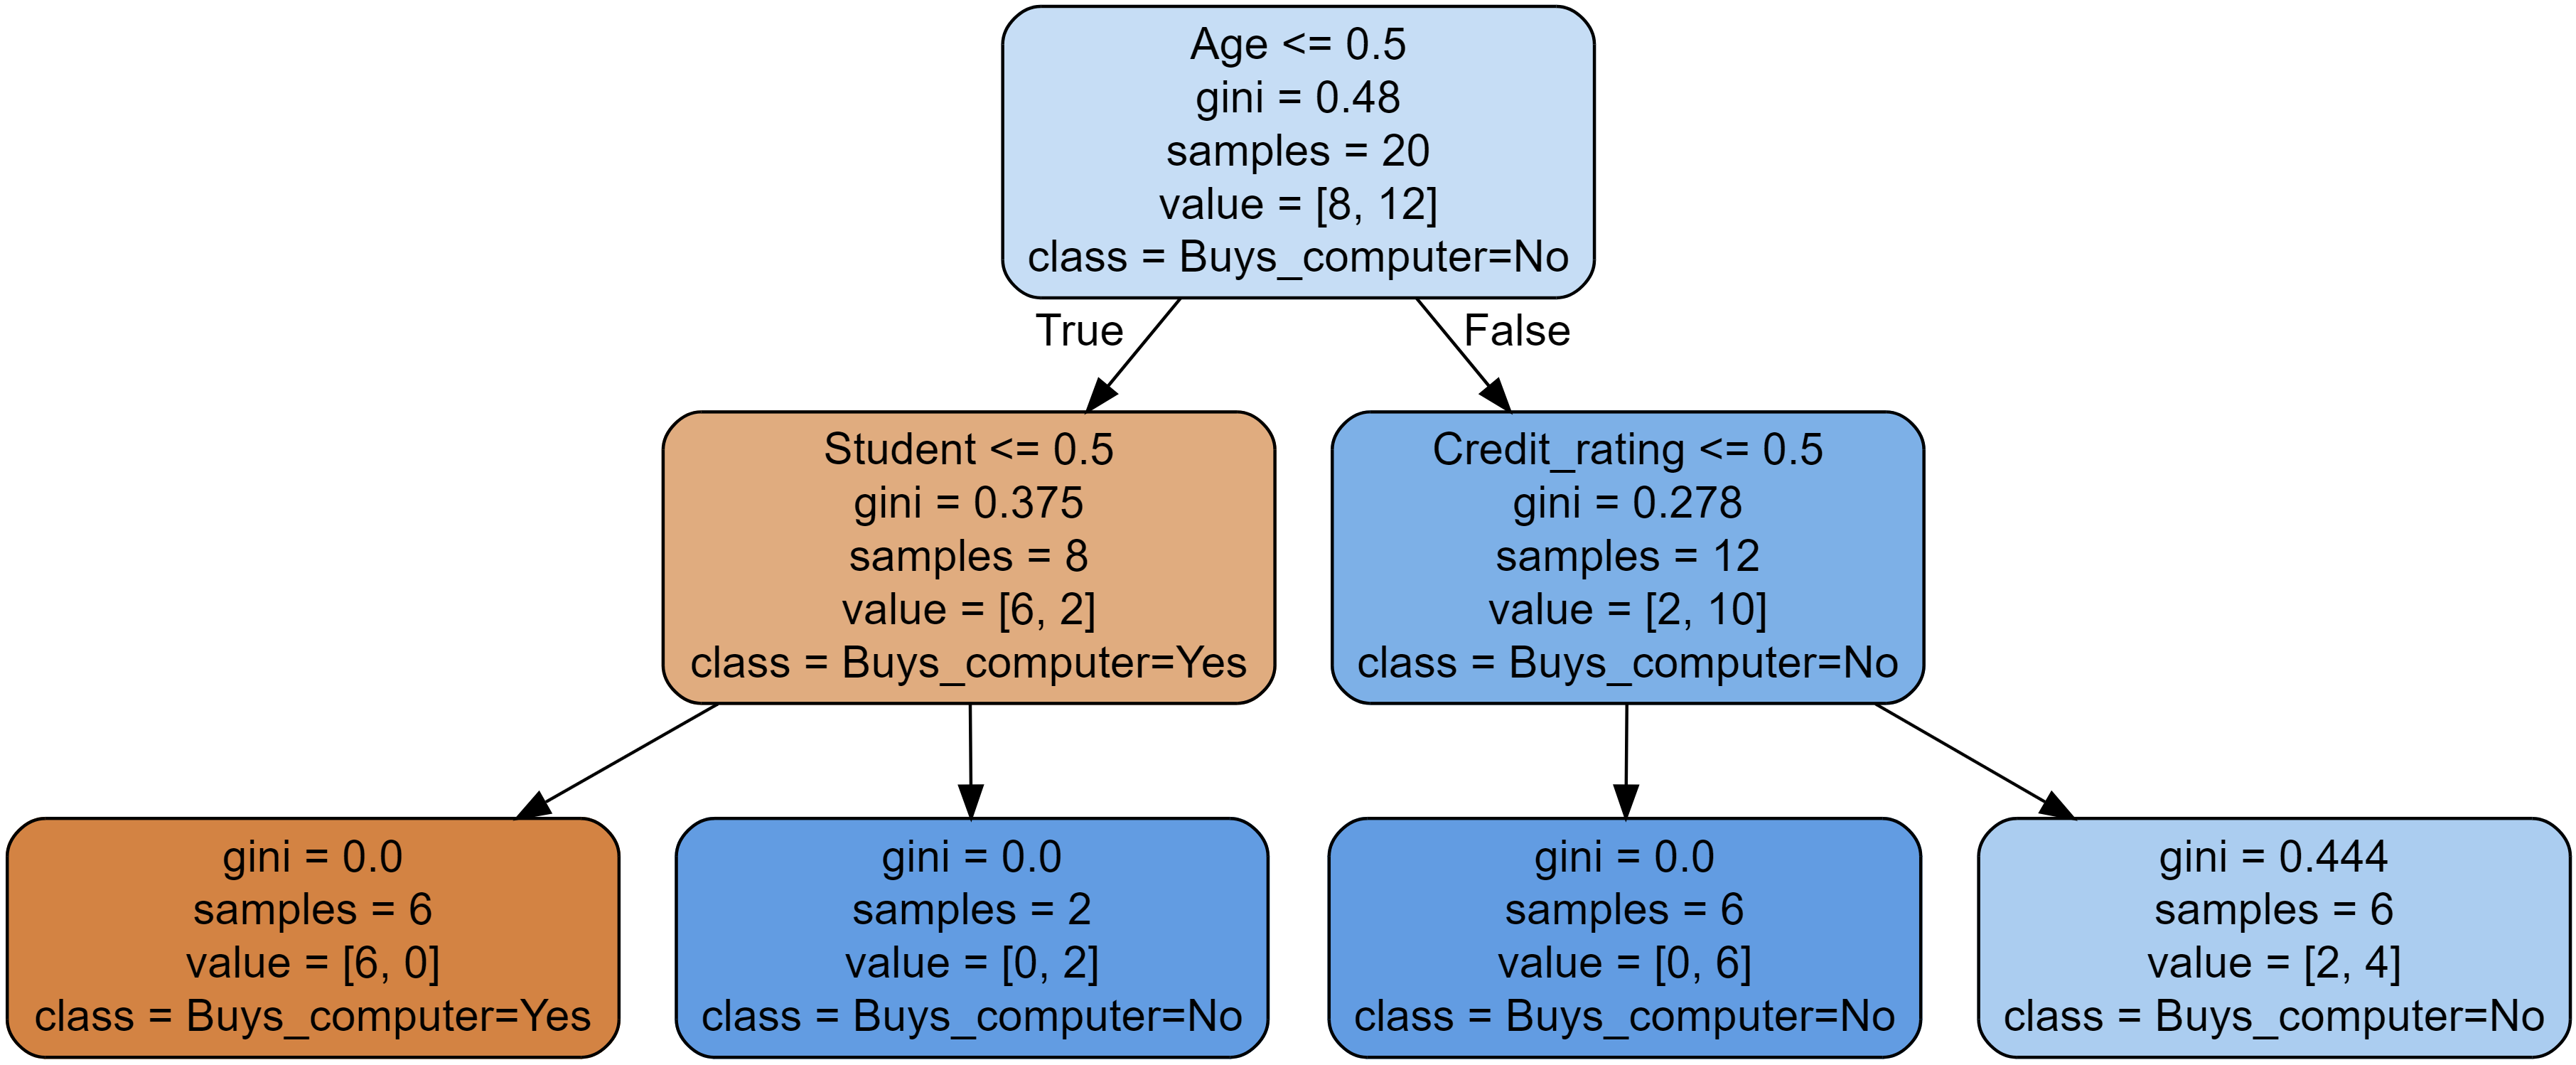

In [12]:
Image("decisiontree_depth2.png", width=800)

Wenn man bei "depth = 2" aufhört, sieht der Baum anders aus, als das was manuell gemacht wurde.

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(DATA[['Age','Income','Student','Credit_rating']], DATA['Buys_computer'])

export_graphviz(tree_clf, 
                out_file="buy_computer_tree2.dot", 
                feature_names=DATA.columns[0:4],
                class_names=["Buys_computer=Yes", "Buys_computer=No"],
                rounded=True, 
                filled=True
               )

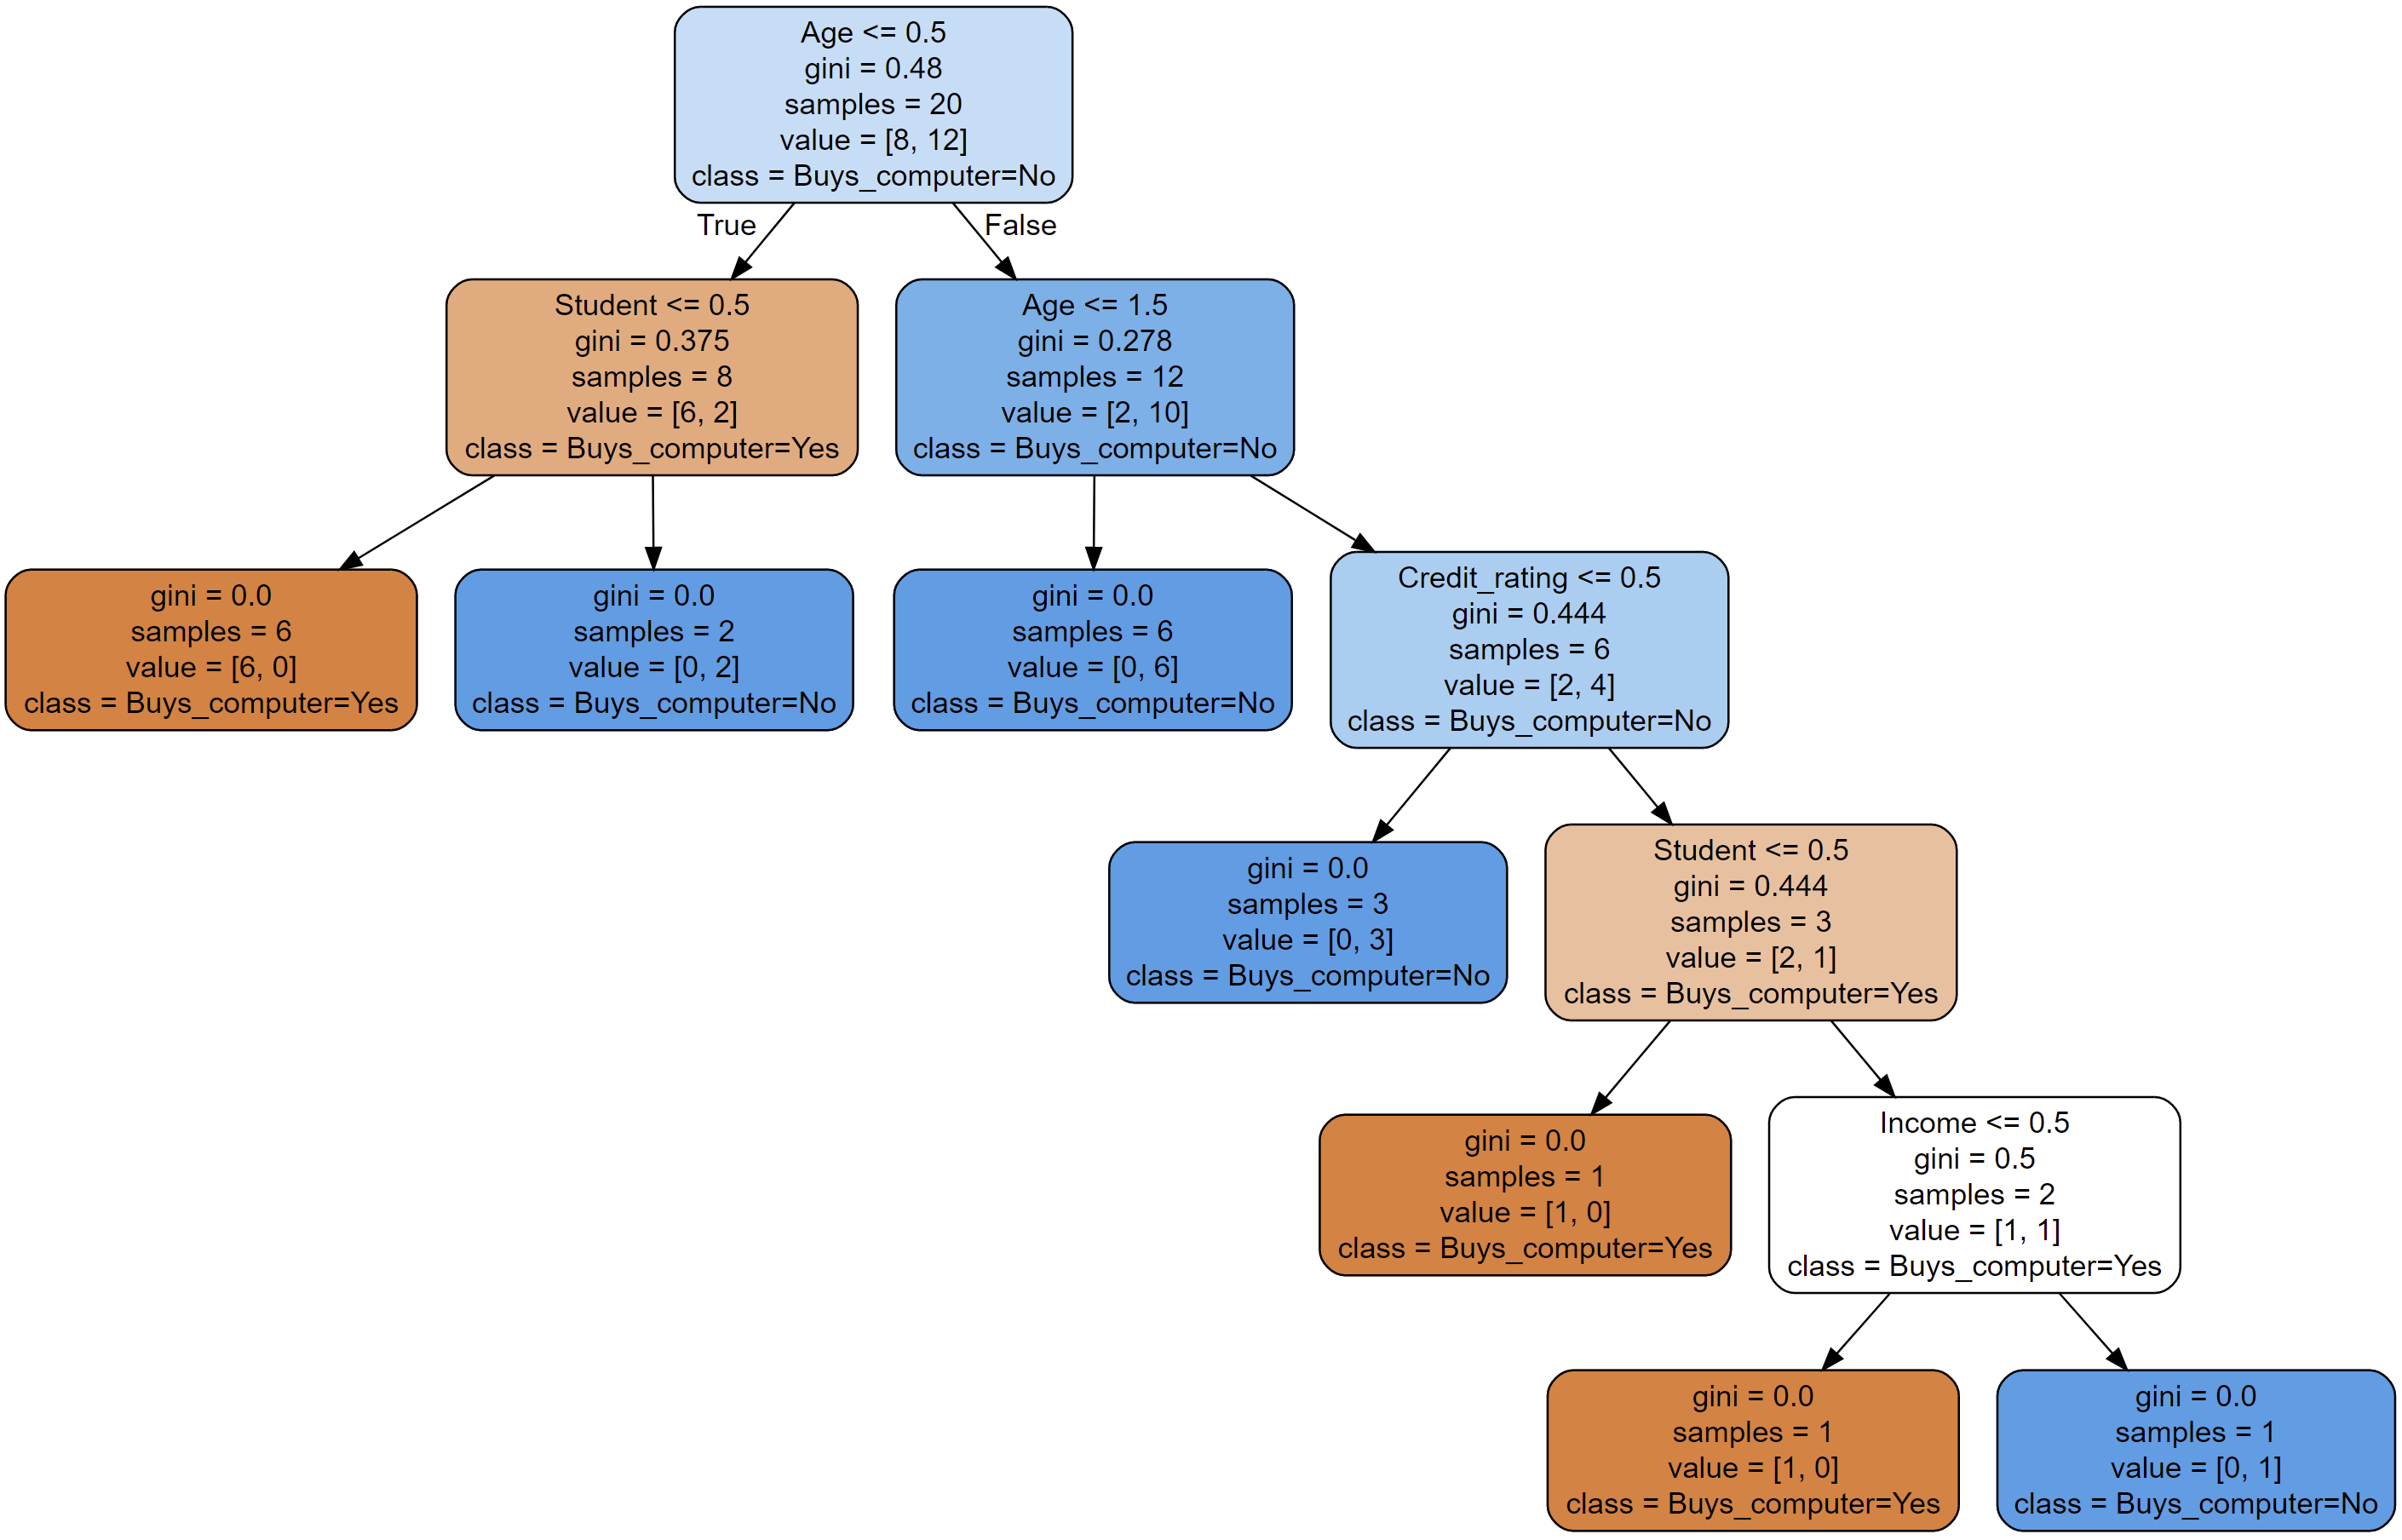

In [14]:
Image("decisiontree_depth6.png")

Das ist ungefährt, das was auch manuell erstellt wurde.